In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sales = pd.read_csv("C:\\Users\\23490\\Downloads\\archive (29)\\retail_sales_dataset.csv")


# CLEANING THE DATA

In [6]:
sales.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000


In [7]:
sales.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
sales.duplicated().sum()

0

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [46]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [47]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   daily_sales       0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 78.2+ KB


# STATISTICAL ANALYSIS 

In [48]:
sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0
daily_sales,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ANALYZE SALES TREND

In [49]:
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,daily_sales
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,NaN
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,NaN
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,NaN
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,NaN
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,NaN


In [50]:
sales['Month_Number'] = sales['Date'].dt.month      
sales['Month_Name']   = sales['Date'].dt.month_name() 
sales['Day_Number']   = sales['Date'].dt.day   
sales['Day_Name']     = sales['Date'].dt.day_name()

In [57]:
sales.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month_Number,Month_Name,Day_Number,Day_Name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,November,24,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,February,27,Monday


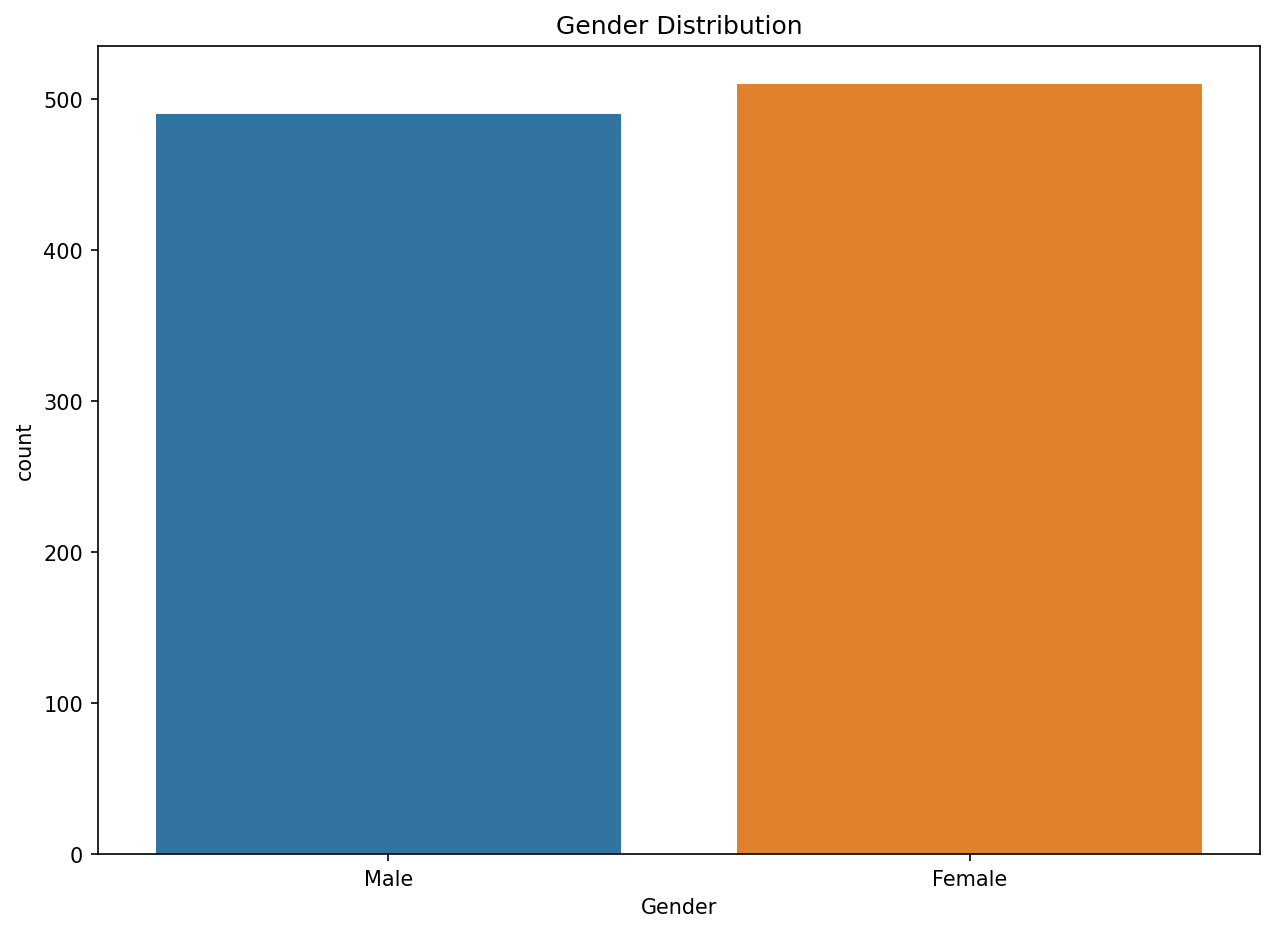

In [144]:
plt.figure(figsize = (10, 7), dpi = 150)

sns.countplot(x = 'Gender', data  = sales)

plt.title('Gender Distribution')

plt.show()

In [129]:
sales['Age Group'] = pd.cut(sales['Age'], bins=[10, 25, 40, 55, 70], labels=['10-25', '26-40', '41-55', '56+'])

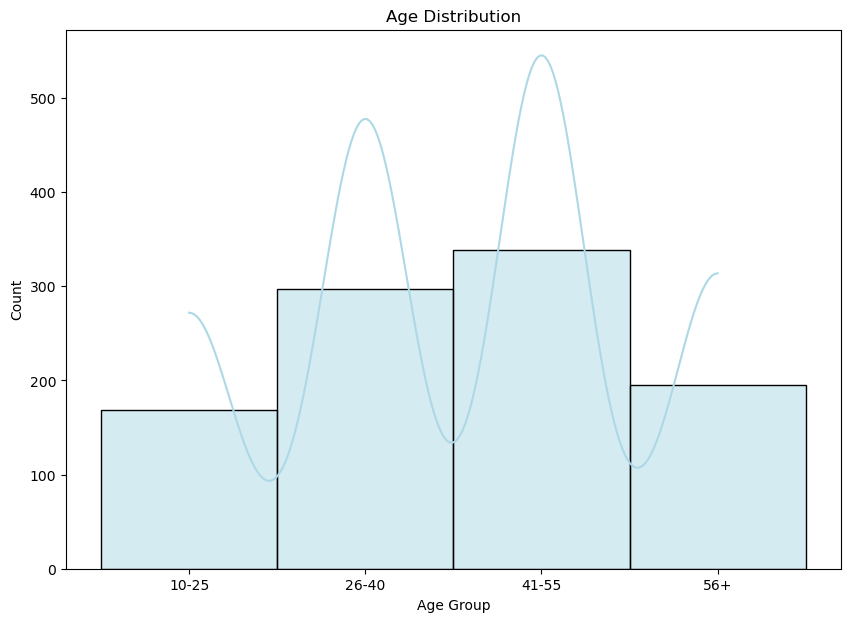

In [145]:
plt.figure(figsize = (10, 7), dpi = 100)

sns.histplot(x = 'Age Group', data  = sales, bins = 10, color = 'lightblue', kde = True)

plt.title ('Age Distribution')

plt.show()

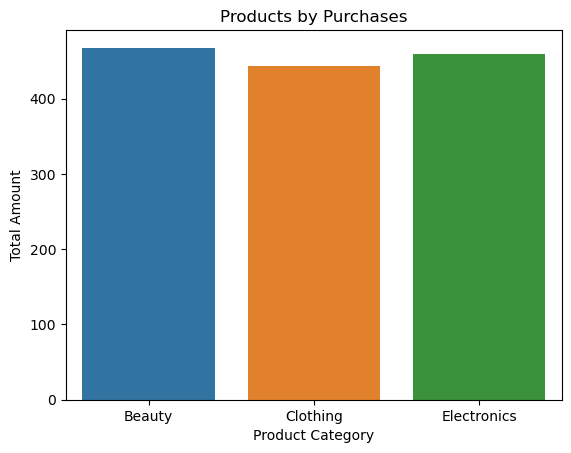

In [146]:
sns.barplot(x = 'Product Category', y = 'Total Amount', data = sales, errorbar = None)

plt.title('Products by Purchases')

plt.show()

In [59]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

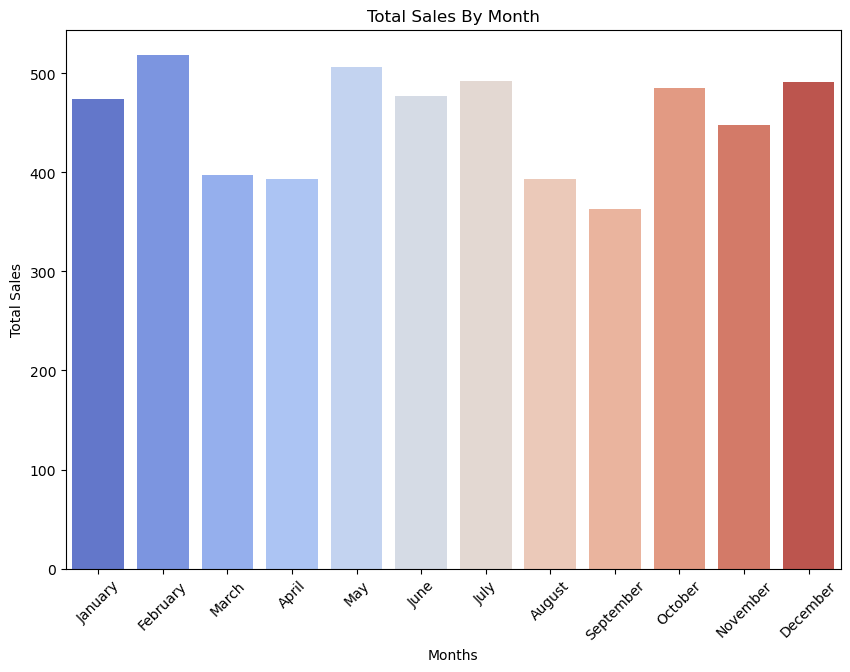

In [150]:
plt.figure(figsize = (10,7))

sns.barplot(y = 'Total Amount', x= 'Month_Name', data = sales, 
            estimator = np.mean, order = month_order, errorbar = None, palette = 'coolwarm')
plt.xticks(rotation=45)

plt.title('Total Sales By Month')

plt.ylabel('Total Sales')

plt.xlabel('Months')

plt.show()

In [70]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

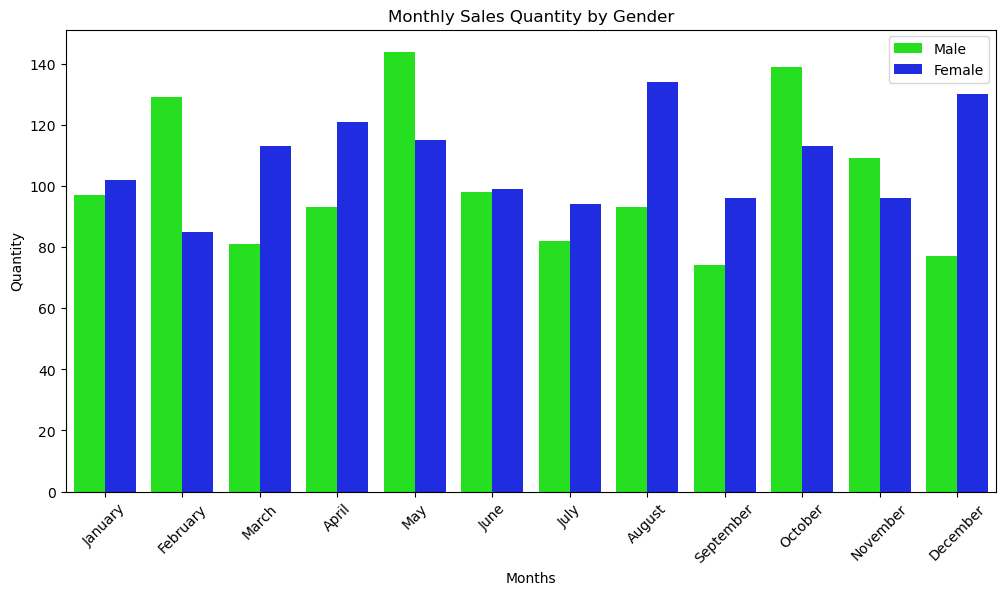

In [104]:
plt.figure(figsize=(12, 6))

sns.barplot(data = sales, x='Month_Name', y='Quantity', hue='Gender', 
            estimator=sum, errorbar=None, order = month_order, palette = 'hsv')

plt.title('Monthly Sales Quantity by Gender')

plt.xlabel('Months')

plt.ylabel('Quantity')

plt.legend() 

plt.xticks(rotation=45);

# Customer and Product Analysis

QUESTION 1:Does customer age and gender influence their purchasing behavior?

In [162]:
pd.pivot_table(sales, index = ['Age Group', 'Gender', 'Product Category'], 
                  values = ['Total Amount'], aggfunc = 'mean', margins = True)

Total Amount
Age Group Gender Product Category              
10-25     Female Beauty              419.843750
                 Clothing            591.250000
                 Electronics         490.000000
          Male   Beauty              637.321429
                 Clothing            473.709677
                 Electronics         432.758621
26-40     Female Beauty              579.000000
                 Clothing            542.244898
                 Electronics         453.750000
          Male   Beauty              425.697674
                 Clothing            470.877193
                 Electronics         435.000000
41-55     Female Beauty              413.272727
                 Clothing            401.461538
                 Electronics         438.017241
          Male   Beauty              554.090909
                 Clothing            372.818182
                 Electronics         444.838710
56+       Female Beauty              335.000000
                 Clothing            419.625000
                 Electronics         433.703704
          Male   Beauty              313.653846
                 Clothing            361.029412
                 Electronics         558.205128
All                                  456.000000

In [163]:

pd.pivot_table(sales, 
               index = ['Age Group', 'Gender'], 
               columns = 'Product Category', 
               values = ['Total Amount', 'Quantity'], 
               aggfunc = {'Total Amount': 'mean', 'Quantity': 'sum'}, 
               margins = True)

Quantity                            Total Amount              \
Product Category   Beauty Clothing Electronics   All       Beauty    Clothing   
Age Group Gender                                                                
10-25     Female       80       48          69   197   419.843750  591.250000   
          Male         72       81          62   215   637.321429  473.709677   
26-40     Female      131      123         158   412   579.000000  542.244898   
          Male        112      151          99   362   425.697674  470.877193   
41-55     Female      138      167         149   454   413.272727  401.461538   
          Male        111      149         146   406   554.090909  372.818182   
56+       Female       69      103          63   235   335.000000  419.625000   
          Male         58       72         103   233   313.653846  361.029412   
All                   771      894         849  2514   467.475570  443.247863   

                                          
Product Category Electronics         All  
Age Group Gender                          
10-25     Female  490.000000  487.283951  
          Male    432.758621  512.272727  
26-40     Female  453.750000  522.129032  
          Male    435.000000  446.584507  
41-55     Female  438.017241  417.022472  
          Male    444.838710  450.093168  
56+       Female  433.703704  398.020833  
          Male    558.205128  426.262626  
All               458.786550  456.000000

QUESTION 2: Are there discernible patterns in sales across different time periods?

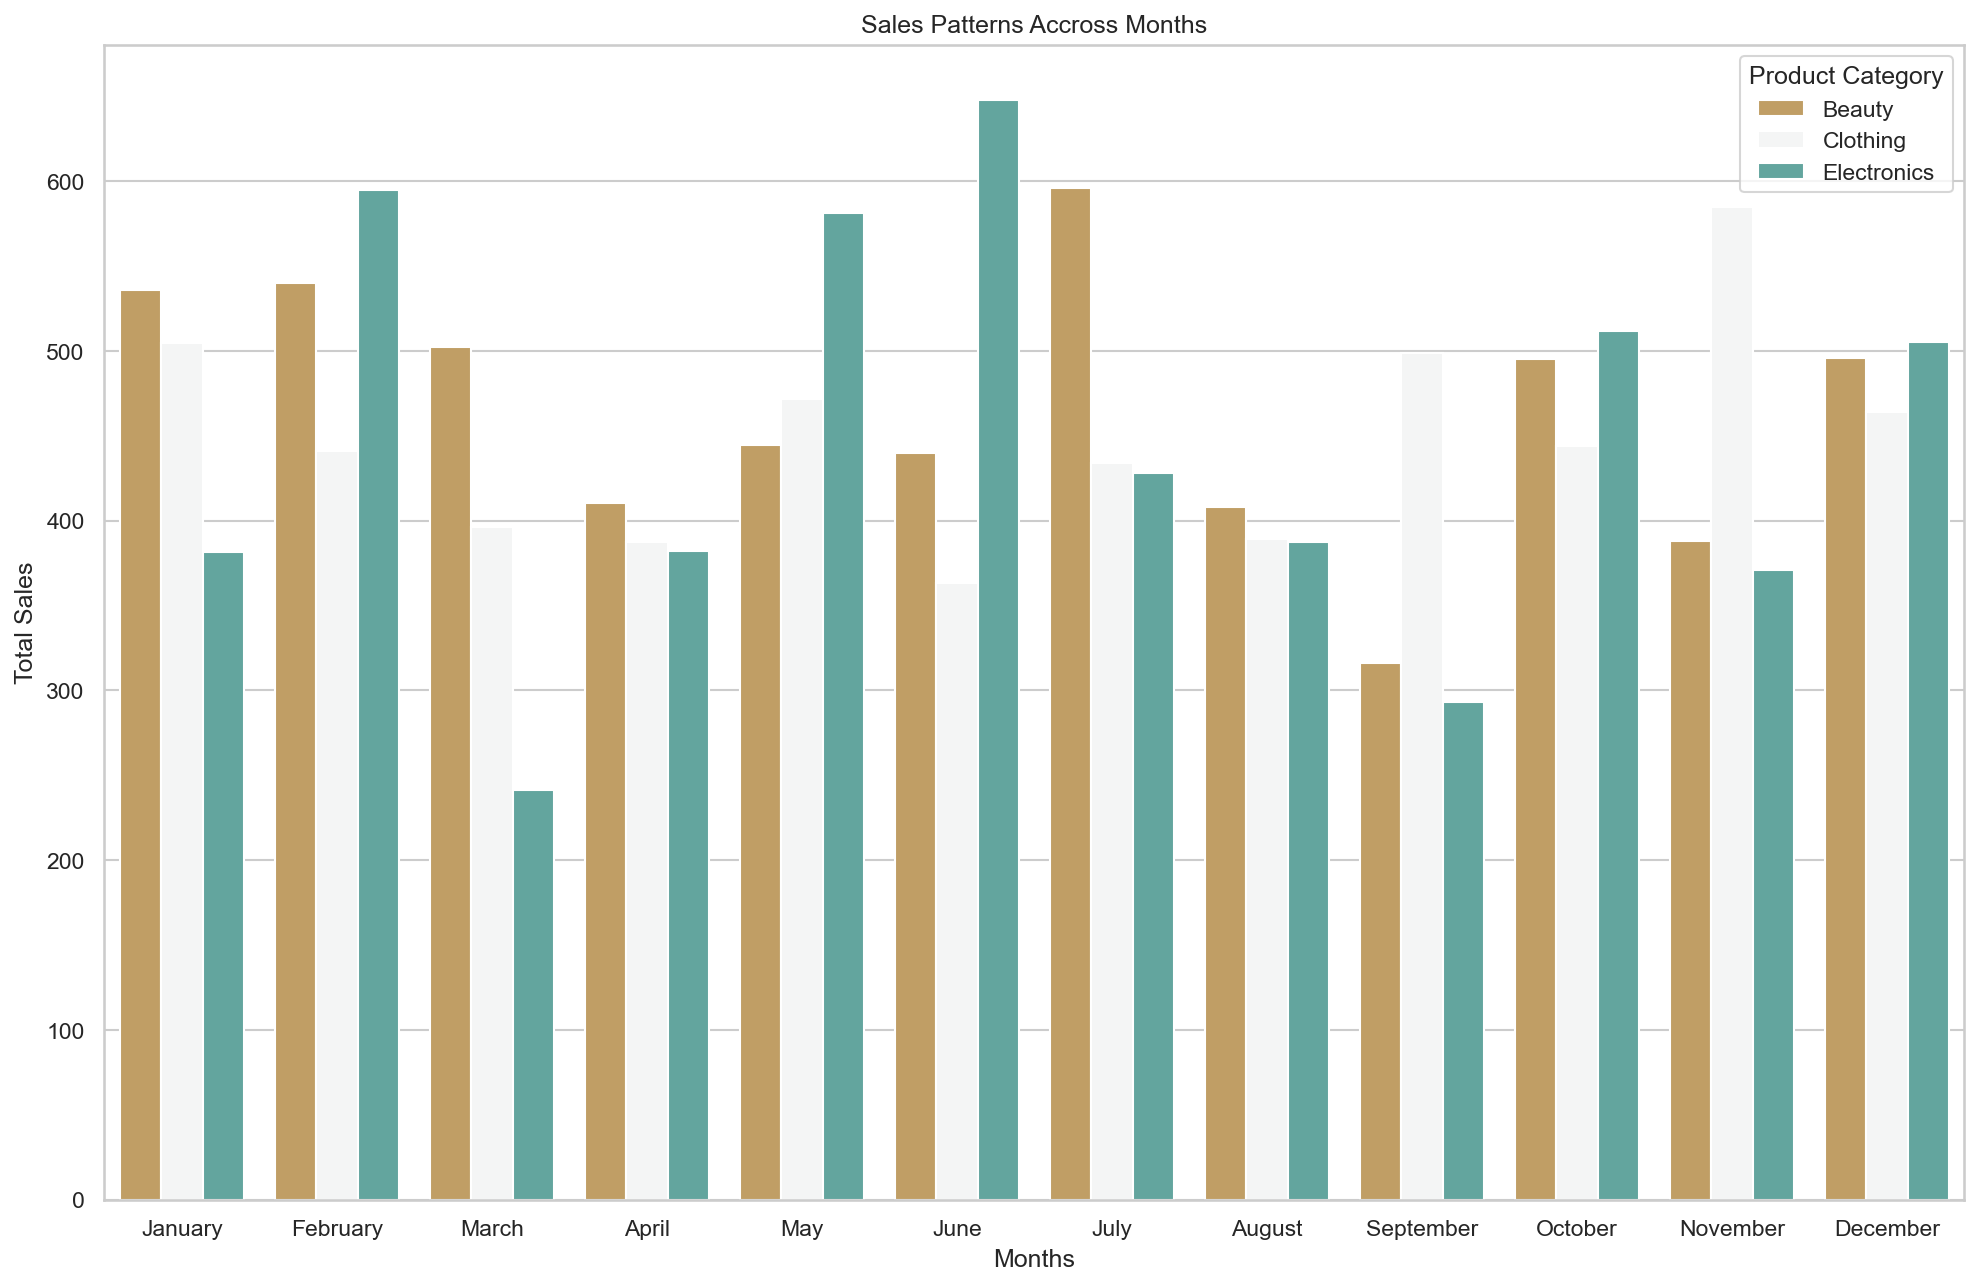

In [202]:
plt.figure(figsize = (16,10), dpi = 150)

sns.barplot(x = 'Month_Name', y = 'Total Amount', hue = 'Product Category',
            data = sales, order = month_order, errorbar = None, palette = 'BrBG')

sns.set(style = 'whitegrid')

plt.title('Sales Patterns Accross Months')

plt.xlabel('Months')

plt.ylabel('Total Sales')

plt.show()

QUESTION 3:Which product categories hold the highest appeal among customers?

In [205]:
sales['Product Category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [210]:
sales.groupby('Product Category')['Total Amount'].describe().transpose()

Product Category,Beauty,Clothing,Electronics
count,307.000000,351.000000,342.00000
mean,467.475570,443.247863,458.78655
std,563.612788,550.695917,567.54015
min,25.000000,25.000000,25.00000
25%,75.000000,60.000000,60.00000
50%,120.000000,120.000000,150.00000
75%,900.000000,600.000000,900.00000
max,2000.000000,2000.000000,2000.00000


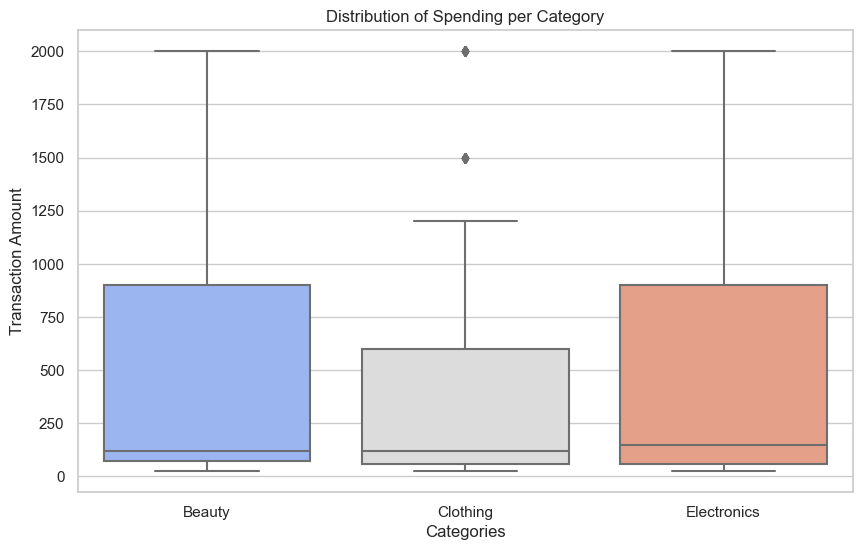

In [213]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Product Category', y='Total Amount', data=sales, palette='coolwarm')

plt.title('Distribution of Spending per Category')

plt.ylabel('Transaction Amount')

plt.xlabel('Categories')

plt.show()

In [ ]:
#clothing has outliers. It has a long tail. 

Clothing (The "Splurge" Appeal): Clothing has a "Tight Box" with "High Outliers." This means that while most people buy very specific, low-priced items, there is a unique segment of customers who splurge on big-ticket items. It suggests that Clothing has the highest "aspirational" appeal—people come there for both the basics and the luxury $2,000 items.

Electronics/Beauty (The "Consistent" Appeal): If their whiskers are longer but they have no dots, it means their prices are highly variable but predictable. You might have items ranging from $50 to $1,000, but you don't have that "shock" factor of a $2,000 outlier. Their appeal is more about a wide variety of mid-to-high-range options.

In [214]:
sales.groupby('Product Category')['Total Amount'].skew()

Product Category
Beauty         1.271071
Clothing       1.457045
Electronics    1.401818
Name: Total Amount, dtype: float64

The high skewness in Clothing mathematically proves that the "average" price is being pulled up by a few very large purchases.Beauty ($1.27$): Highly skewed, but more "compact." People spend more on average, but they don't go as "crazy" with high-end purchases as they do in Clothing.Electronics ($1.40$): Also highly skewed, likely because you have a mix of cheap accessories and expensive gadgets, but it still lacks those extreme $2,000$ "splurge" outliers you see in Clothing.Clothing ($1.45$): The Skewness King. This confirms that while most people buy cheap items, the "ceiling" for what people are willing to spend is much higher here than in the other categories.

QUESTION 4:What are the relationships between age, spending, and product preferences?

In [216]:
cor = sales['Age'].corr(sales['Total Amount'])

In [217]:
cor

-0.06056802388304562

In [229]:
age_pref = sales.groupby('Product Category')['Age'].agg(['mean', 'median', 'std'])

In [230]:
age_pref

,mean,median,std
Product Category,,,
Beauty,40.371336,41.0,13.889817
Clothing,41.948718,42.0,13.498262
Electronics,41.736842,42.0,13.669573


Age and Spending: There is a weak and negative relationship (Correlation: $-0.06$). This tells us that as customers age, their individual spending does not significantly increase or decrease; age is not a predictor of a person's budget.Age and Product Preference: There is no relationship (homogenous distribution). Because the median age for Beauty, Clothing, and Electronics is almost identical (approx. 41–42 years), we know that age doesn't influence what a person chooses to buy.The "Volume" Factor: While age doesn't change how people shop, it defines who shops. The "40s" demographic is the most frequent shopper, meaning they drive the most revenue through sheer volume of transactions, even if their individual spending habits match a 20-year-old's.

"The business is supported by a stable, high-volume base of middle-aged shoppers, but finds its peak profitability through high-value 'splurge' purchases from younger demographics during key gift-giving months (February and May). While age doesn't dictate what people buy, it dictates how much and how often they buy. Success lies in protecting the 40s volume while specifically targeting the 'splurge' potential of the 10–25 age group."

1. Seasonal Revenue Maximization
Finding: Sales peak in February and May, but crash in September.

Recommendation: The "September Pivot." Since September is your lowest month, do not try to sell high-end luxury. Instead, pivot to "Essential Refills" or "Back-to-Routine" bundles.

The February Strategy: Since Men spend more in 4 months (including Feb), focus marketing on High-Ticket Gifting. Men are clearly "Event Shoppers" who are less price-sensitive when a deadline (like Valentine's) is approaching.

2. High-Value Targeting (The "Young Whales")
Finding: Customers aged 10–25 have the highest average spend in Beauty (Males: $637) and Clothing (Females: $591).

Recommendation: Premium Influencer Campaigns. This demographic isn't buying basics; they are buying "Status" items (your $2,000 outliers).

Action: Create "Limited Edition" drops in Clothing and High-End Grooming kits for men. These should be marketed on platforms like TikTok/Instagram where this age group discovers luxury trends.

3. Protecting the "Volume Engine" (The 40s)
Finding: The 41–55 group buys the most Quantity but at a lower average price.

Recommendation: The "Family Bundle" Loyalty Program. This group is likely shopping for households.

Action: Implement a "Buy More, Save More" model. For example, "Buy 3 Beauty staples, get 20% off." This encourages them to keep their high-volume shopping at your store rather than price-shopping with competitors.

4. Bridging the Gender Gap
Finding: Women are steady shoppers (8 months of dominance), while men are "Spike" shoppers.

Recommendation: Gender-Specific Retargeting. * For Women: Focus on "New Arrivals" and "Consistency." Use weekly newsletters to maintain that 8-month steady revenue.

For Men: Focus on "Last Minute" and "Premium." Use SMS alerts or targeted ads 10 days before major holidays (Feb/May) to trigger those high-value purchases.